<a href="https://colab.research.google.com/github/kruti002/synapse_lp_tasks/blob/CVWeek2/CV_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CV Week 2**

## **DJS Synapse Learning Period**
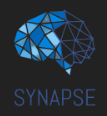

In [256]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.1 DATA AUGMENTATION

Watch the video to understand why data augmentation is done:          
https://www.youtube.com/watch?v=rfM4DaLTkMs

REFER THE BELOW ARTICLE FOR CODES :     
https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

download the image https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrqWUxvjvW1PfKP4HLmhEG4fN4x1qEbPD3qw&usqp=CAU using wget (save it as aug.jpg)

In [257]:
# download the image
!wget -O aug.jpg  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrqWUxvjvW1PfKP4HLmhEG4fN4x1qEbPD3qw&usqp=CAU

--2023-01-17 18:06:46--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrqWUxvjvW1PfKP4HLmhEG4fN4x1qEbPD3qw
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 108.177.119.138, 108.177.119.100, 108.177.119.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|108.177.119.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3069 (3.0K) [image/jpeg]
Saving to: ‘aug.jpg’

aug.jpg             100%[===================>]   3.00K  --.-KB/s    in 0s      

2023-01-17 18:06:46 (36.3 MB/s) - ‘aug.jpg’ saved [3069/3069]



write code and display output for Horizontal and vertical shift image augmentation
(refer the above article and plot 9 images similary as it was done in the article)

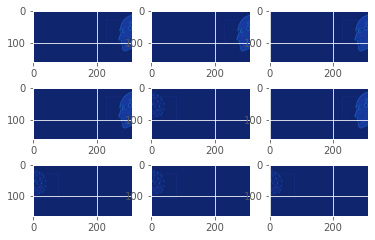

In [258]:
# horizontal shift image augmentation
from numpy import expand_dims                             # dimension expansion
import keras
from keras_preprocessing.image import load_img# load image
from keras_preprocessing.image import img_to_array        # img to numpy array
from keras_preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# steps:-
#load the image
img = load_img('aug.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-175,175])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

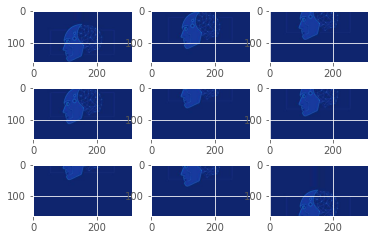

In [259]:
# vertical shift image augmentation
# add code below
# load the image
img = load_img('aug.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()


Write code and display output for Horizontal and vertical **flip** image augmentation

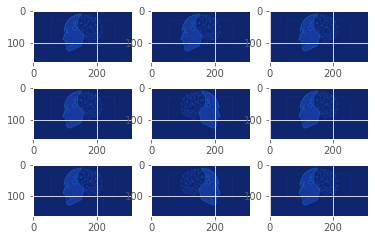

In [260]:
# code here
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  batch = it.next()
  image = batch[0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

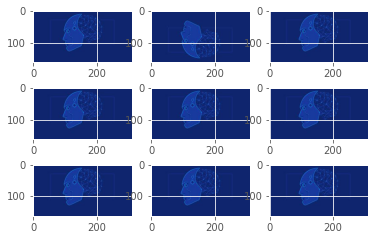

In [261]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
 pyplot.subplot(330 + 1 + i)
 batch = it.next()
 image = batch[0].astype('uint8')
 pyplot.imshow(image)
pyplot.show()

Random Rotation Augmentation

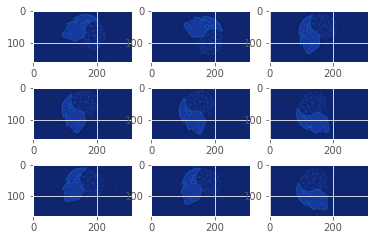

In [262]:
# code here
datagen = ImageDataGenerator(rotation_range=90)

it = datagen.flow(samples, batch_size=1)
for i in range(9):

 pyplot.subplot(330 + 1 + i)

 batch = it.next()
 
 image = batch[0].astype('uint8')

 pyplot.imshow(image)

pyplot.show()

Random Brightness Augmentation

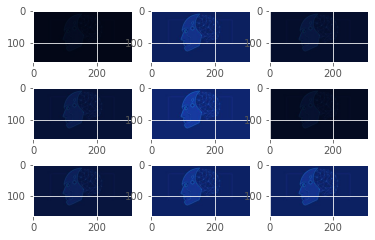

In [263]:
# code here
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
 pyplot.subplot(330 + 1 + i)
 batch = it.next()
 image = batch[0].astype('uint8')
 pyplot.imshow(image)
pyplot.show()

Random Zoom Augmentation

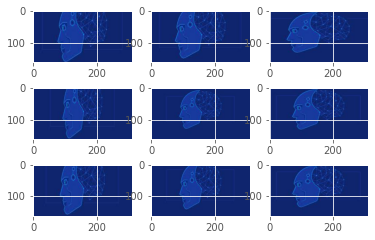

In [264]:
# code here
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
 pyplot.subplot(330 + 1 + i)
 batch = it.next()
 image = batch[0].astype('uint8')
 pyplot.imshow(image)
pyplot.show()

###OPTIONAL
Any other augmentation of your choice. Be creative 😀✨ 

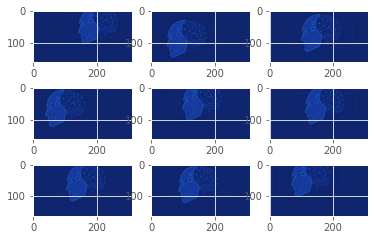

In [265]:
# code 
# random shift augmentation 
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
 pyplot.subplot(330 + 1 + i)
 batch = it.next()
 image = batch[0].astype('uint8')
 pyplot.imshow(image)
pyplot.show()


# 2.2 Intro to TensorFlow: Classify images of clothing

In [304]:
# import Tensorflow


import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import activation, Dense, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import accuracy
import numpy as np
# import the other helper libraries required




## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [267]:
#complete the code below:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()



In [268]:
#load the data into train_images, train_labels, test_images, test_labels
(train_images, train_labels), (test_images, test_labels)=fashion_mnist

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [269]:
#store the class names in a list
#complete the code below
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [270]:
#check the dimensions of the training data
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [271]:
#verify the number of train_lables
train_labels.shape


(60000,)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [272]:
#verify the number of images in test_images by checking the dimensions
test_images.shape


(10000, 28, 28)

And the test set contains 10,000 images labels:

In [273]:
#verify the number of images in test_labels
test_labels.shape


(10000,)

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

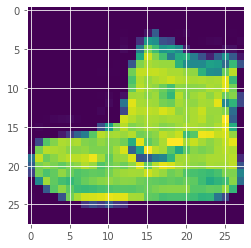

In [274]:
#plot a figure using the imshow() function to view the first image in train_images (train_images[0])

import matplotlib.pyplot as plt
plt.imshow(train_images[0])


Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [275]:
#complete the code below
train_images = train_images/255.0
test_images = test_images/255.0

To verify that the data is in the correct format and that you're ready to build and train the network, display the first 25 images from the *training set* and display the class name below each image.

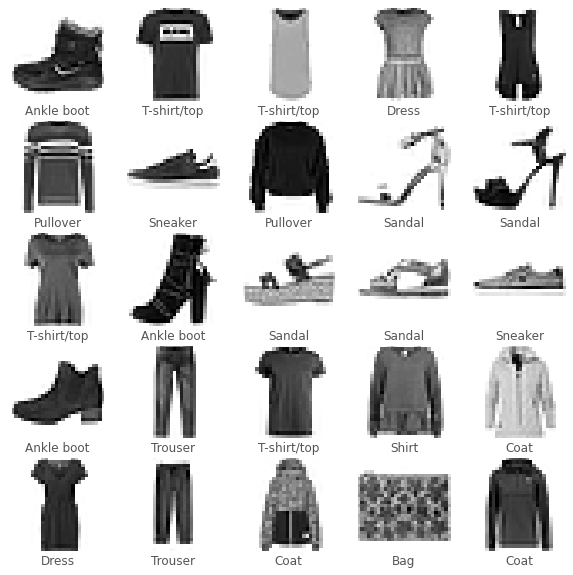

In [276]:
#write code below
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [300]:
#create a model having the layers defined below this cell

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers with a 'BatchNormalization()' layer in between the 2 dense layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes. 
The Batch Normalization layer works by performing a series of operations on the incoming input data. The set of operations involves standardization, normalization, rescaling and shifting of offset of input values coming into the BN layer.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [301]:
#compile the model using model.compile using the adam optimizer, SparseCategoricalCrossentropy loss and accuracy as metrics

model.compile(Adam(learning_rate = 0.0005), loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [303]:
#write code below setting epochs=10:
model.fit(x = train_images, y = train_labels, epochs=10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 3s 5ms/step - loss: 0.5052 - accuracy: 0.8258
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3780 - accuracy: 0.8660
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3442 - accuracy: 0.8765
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3246 - accuracy: 0.8827
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3085 - accuracy: 0.8873
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2938 - accuracy: 0.8931
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2837 - accuracy: 0.8975
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2729 - accuracy: 0.9000
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2631 - accuracy: 0.9038
Epoch 10/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2572 - accuracy: 0.9063

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset using model.evaluate():

In [305]:
#complete code below


test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3598 - accuracy: 0.8749

Test accuracy: 0.8748999834060669


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [306]:
#complete code below
probability_model =model 

In [307]:
#predict on the test_images using the probability_model
predictions =model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [308]:
predictions[0]

array([7.9819199e-07, 5.5578954e-07, 1.4824576e-04, 1.4537308e-05,
       1.8707278e-05, 7.9378653e-03, 1.2220452e-04, 5.9765638e-03,
       2.8702609e-06, 9.8577768e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [309]:
#use np.argmax to find the highest confidence value
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [310]:
test_labels[0]

9

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.
Plot should look like this:
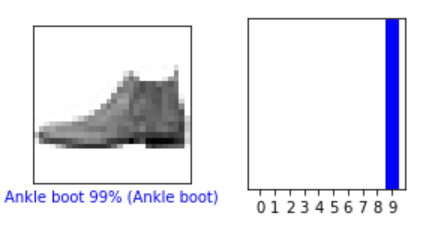

([<matplotlib.axis.XTick at 0x7f3a73986af0>,
 <a list of 10 Text major ticklabel objects>)

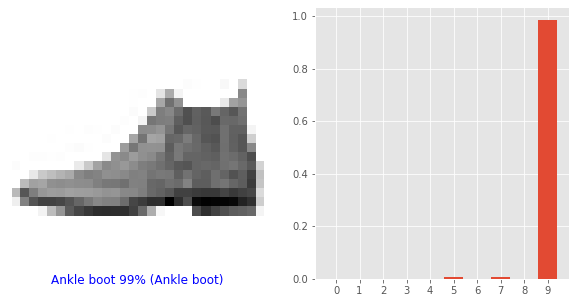

In [311]:
#plot the 0th image and next to that plot a bar graph of the predicted values for that image
#  if predicted_label is the same as the actual label of the image then the x_axis label should be in blue, whereas 
# if the predicted_label is not the same as the actual label of the image then the x_axis label should be in red

image_index = 0 
pyplot.figure(figsize=(10,5))
pyplot.subplot(1,2,1)
ax = pyplot.imshow(test_images[image_index], cmap='gray_r')
str1 = f'{class_names[np.argmax(predictions[image_index])]} '+ "%.0f" % (max(predictions[image_index])*100)+ f'% ({class_names[test_labels[image_index]]})'
if np.argmax(predictions[image_index]) == test_labels[image_index] :
  pyplot.xlabel(str1,color='blue')
else:
  pyplot.xlabel(str1,color='red')
pyplot.xticks([])
pyplot.yticks([])
pyplot.subplot(1,2,2)
pyplot.bar(range(10),predictions[image_index])
pyplot.xticks(range(10))

Similarly plot the image and predicted values for another value in the test_images

([<matplotlib.axis.XTick at 0x7f3a73664a90>,
 <a list of 10 Text major ticklabel objects>)

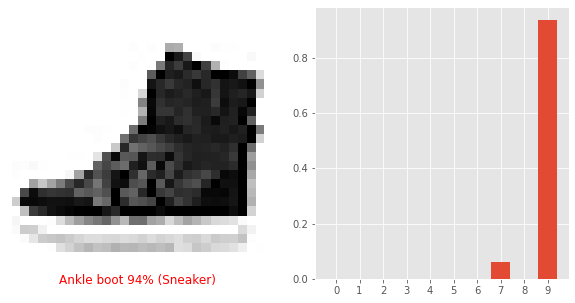

In [312]:
#write code below
image_index = 800
pyplot.figure(figsize=(10,5))
pyplot.subplot(1,2,1)
ax = pyplot.imshow(test_images[image_index], cmap='gray_r')
str1 = f'{class_names[np.argmax(predictions[image_index])]} '+ "%.0f" % (max(predictions[image_index])*100)+ f'% ({class_names[test_labels[image_index]]})'
if np.argmax(predictions[image_index]) == test_labels[image_index] :
  pyplot.xlabel(str1,color='blue')
else:
  pyplot.xlabel(str1,color='red')
pyplot.xticks([])
pyplot.yticks([])
pyplot.subplot(1,2,2)
pyplot.bar(range(10),predictions[image_index])
pyplot.xticks(range(10))


plot several images with their predictions. Note that the model can be wrong even when very confident.

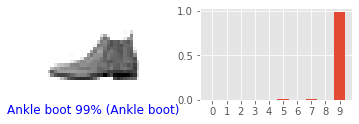

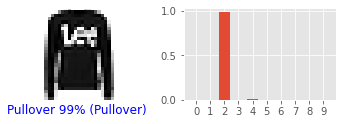

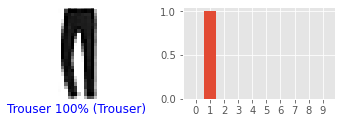

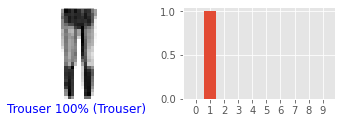

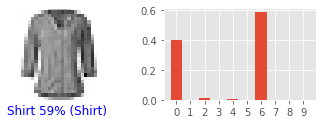

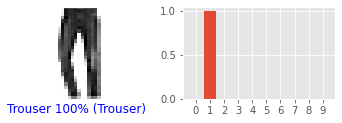

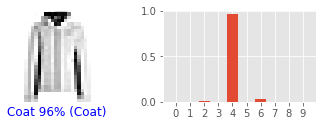

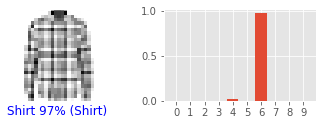

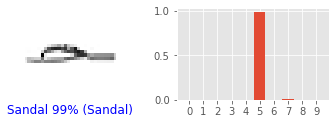

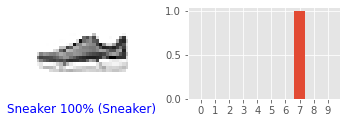

In [313]:
# Plot the first 10 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
for image_index in range(10):
  pyplot.figure(figsize=(6,20))
  pyplot.subplot(10,2,1)
  ax = pyplot.imshow(test_images[image_index], cmap='gray_r')
  str1 = f'{class_names[np.argmax(predictions[image_index])]} '+ "%.0f" % (max(predictions[image_index])*100)+ f'% ({class_names[test_labels[image_index]]})'
  if np.argmax(predictions[image_index]) == test_labels[image_index] :
    pyplot.xlabel(str1,color='blue')
  else:
    pyplot.xlabel(str1,color='red')
  pyplot.xticks([])
  pyplot.yticks([])
  pyplot.subplot(10,2,2)
  pyplot.bar(range(10),predictions[image_index])
  pyplot.xticks(range(10))

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [289]:
# Grab an image from the test dataset.
img =test_images[420] 



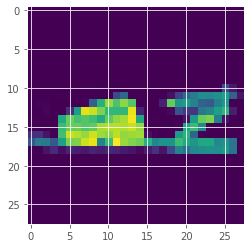

In [290]:
plt.imshow(test_images[420] 
)

`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [291]:
# Add the image to a batch where it's the only member.
#hint: use np.expand_dims
#complete code below
img = np.expand_dims(img,0)

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [292]:
#complete code below
predictions_single = np.argmax(model.predict(img))

print(predictions_single)

1/1 [==============================] - 0s 18ms/step
5


`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [293]:
#print the predicted class for the image
class_names[predictions_single]

'Sandal'

# Regularization
In mathematics, statistics, and computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting.

In order to improve the performance of the model, we use different regularization techniques. There are several techniques, but we will discuss 4 main techniques.

1. L1 Regularization
2. L2 Regularization
3. Dropout
4. Batch Normalization

In [294]:
#Basic pre-processing
#we're importing the iris dataset from sklearn for our model
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target
y = to_categorical(y) #converting output to one-hot vector
ss = StandardScaler() #standardizing the data
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=16)

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [296]:
#explore the data (X and y) however you like, (using info(), describe, graphs, etc.) and write any 4 lines on what you understood about the dataset

#Solution can be anything


And the model predicts a label as expected.

In [297]:
#model building

#run the code given below and observe the performance of this simple model having no regularization

model1 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
print(model1.summary())
model1.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist1 = model1.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 512)               2560      
                                                                 
 dense_155 (Dense)           (None, 256)               131328    
                                                                 
 dense_156 (Dense)           (None, 128)               32896     
                                                                 
 dense_157 (Dense)           (None, 64)                8256      
                                                                 
 dense_158 (Dense)           (None, 32)                2080      
                                                                 
 dense_159 (Dense)           (None, 3)                 99        
                                                                 
Total params: 177,219
Trainable params: 177,219
Non-t

In [298]:
#After training the model, evaluate the model and find the  loss, accuracy and mse on the test set using the evaluate() function
#print the loss, accuracy and MSE

loss, accuracy, mse = model1.evaluate(X_test, y_test)
print(f'Loss : {loss}\nAccuracy : {accuracy}\nMSE : {mse}')

2/2 [==============================] - 0s 6ms/step - loss: 0.3730 - acc: 0.8158 - mse: 0.0760
Loss : 0.37302353978157043
Accuracy : 0.8157894611358643
MSE : 0.07602844387292862


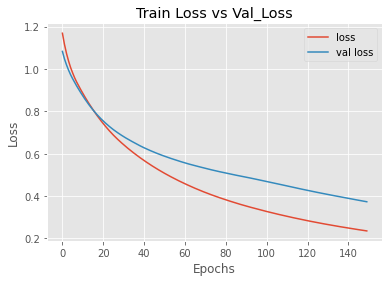

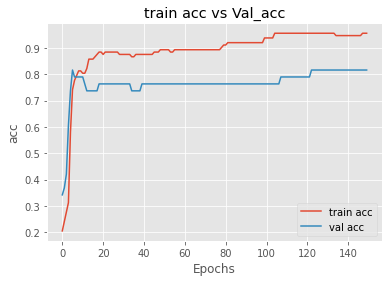

In [299]:
#Observe the plots for Validation Loss and Training Loss.

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist1.history['loss'], label = 'loss')
plt.plot(hist1.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# we observe that validation loss is increasing as compared to training loss. 
# This increase in training loss shows that our model is overfitted.

#similarly we plot for model accuracy 
plt.plot(hist1.history['acc'], label = 'train acc')
plt.plot(hist1.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

#This again shows that validation accuracy is low as compared to training accuracy, which again shows signs of overfitting. 




## L1 Regularization:
 


In [232]:

#A commonly used Regularization technique is L1 regularization, also known as Lasso Regularization.

#The main concept of L1 Regularization is that we have to penalize our weights by adding absolute values of weight in our loss function, multiplied by a regularization parameter lambda λ, where λ is manually tuned to be greater than 0.



#to implement L1 regularization, create another model called model2 similar to model1, this time add an extra parameter kernel_regularizer, which we set it to ‘l1’ for L1 Regularization in the first Dense layer:

model2 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer ='l1'),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
print(model2.summary())
model2.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist2 = model2.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))



Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 512)               2560      
                                                                 
 dense_105 (Dense)           (None, 256)               131328    
                                                                 
 dense_106 (Dense)           (None, 128)               32896     
                                                                 
 dense_107 (Dense)           (None, 64)                8256      
                                                                 
 dense_108 (Dense)           (None, 32)                2080      
                                                                 
 dense_109 (Dense)           (None, 3)                 99        
                                                                 
Total params: 177,219
Trainable params: 177,219
Non-t

In [233]:


#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss, accuracy, mse = model2.evaluate(X_test, y_test)
print(f'Loss : {loss}\nAccuracy : {accuracy}\nMSE : {mse}')

 


2/2 [==============================] - 0s 5ms/step - loss: 1.1044 - acc: 0.8684 - mse: 0.0544
Loss : 1.104354739189148
Accuracy : 0.8684210777282715
MSE : 0.05435948073863983


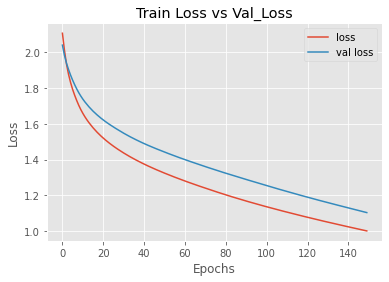

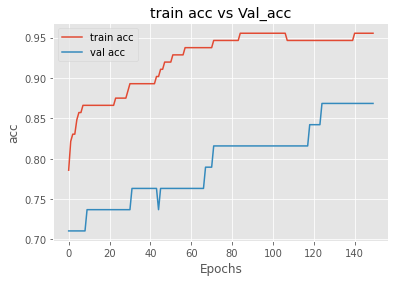

In [234]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before


plt.style.use('ggplot')
plt.plot(hist2.history['loss'], label = 'loss')
plt.plot(hist2.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist2.history['acc'], label = 'train acc')
plt.plot(hist2.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()
 


In [235]:

# create a new model model3, similar to model1 and model2 and add l1 in more layers to check if it improves the model or not.

model3 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer ='l1'),
    Dense(512//2, activation='tanh', kernel_regularizer ='l1'),
    Dense(512//4, activation='tanh', kernel_regularizer ='l1'),
    Dense(512//8, activation='tanh', kernel_regularizer ='l1'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
print(model3.summary())
model3.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist3 = model3.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 512)               2560      
                                                                 
 dense_111 (Dense)           (None, 256)               131328    
                                                                 
 dense_112 (Dense)           (None, 128)               32896     
                                                                 
 dense_113 (Dense)           (None, 64)                8256      
                                                                 
 dense_114 (Dense)           (None, 32)                2080      
                                                                 
 dense_115 (Dense)           (None, 3)                 99        
                                                                 
Total params: 177,219
Trainable params: 177,219
Non-t

In [236]:

#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set


 
loss, accuracy, mse = model3.evaluate(X_test, y_test)
print(f'Loss : {loss}\nAccuracy : {accuracy}\nMSE : {mse}')


2/2 [==============================] - 0s 7ms/step - loss: 63.1704 - acc: 0.7895 - mse: 0.0784
Loss : 63.1703987121582
Accuracy : 0.7894737124443054
MSE : 0.07838074117898941


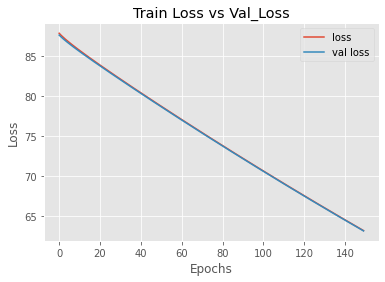

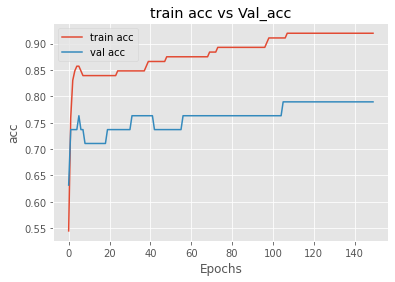

In [237]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist3.history['loss'], label = 'loss')
plt.plot(hist3.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist3.history['acc'], label = 'train acc')
plt.plot(hist3.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


## L2 Regularization


In [238]:
 

# L2 Regularization is another regularization technique which is also known as Ridge regularization. In L2 regularization we add the squared magnitude of weights to penalize our lost function.

#to implement L2 regularization, create another model called model4 similar to our initial basic model, this time add an extra parameter kernel_regularizer, which we set to ‘l2’ for L1 Regularization in the first Dense layer.
#compile and run the model
model4 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer ='l2'),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
print(model4.summary())
model4.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist4 = model4.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

 


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 512)               2560      
                                                                 
 dense_117 (Dense)           (None, 256)               131328    
                                                                 
 dense_118 (Dense)           (None, 128)               32896     
                                                                 
 dense_119 (Dense)           (None, 64)                8256      
                                                                 
 dense_120 (Dense)           (None, 32)                2080      
                                                                 
 dense_121 (Dense)           (None, 3)                 99        
                                                                 
Total params: 177,219
Trainable params: 177,219
Non-t

In [239]:

#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set
loss, accuracy, mse = model4.evaluate(X_test, y_test)
print(f'Loss : {loss}\nAccuracy : {accuracy}\nMSE : {mse}')


2/2 [==============================] - 0s 6ms/step - loss: 0.3979 - acc: 0.8158 - mse: 0.0672
Loss : 0.39787808060646057
Accuracy : 0.8157894611358643
MSE : 0.067168690264225


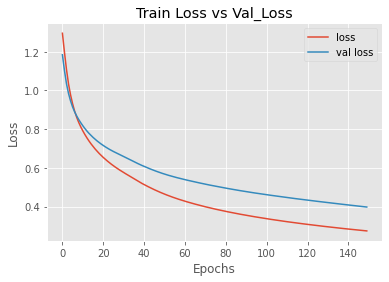

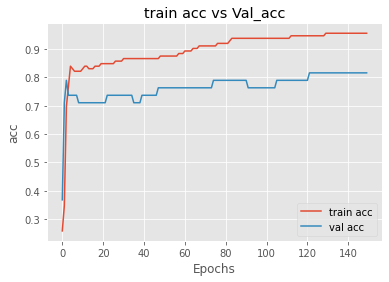

In [240]:

# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before
plt.style.use('ggplot')
plt.plot(hist4.history['loss'], label = 'loss')
plt.plot(hist4.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist4.history['acc'], label = 'train acc')
plt.plot(hist4.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()




In [241]:

# Now create model5 having similar to the above models having L2 in all other layers.

model5 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer ='l2'),
    Dense(512//2, activation='tanh', kernel_regularizer ='l2'),
    Dense(512//4, activation='tanh', kernel_regularizer ='l2'),
    Dense(512//8, activation='tanh', kernel_regularizer ='l2'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
print(model5.summary())
model5.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist5 = model5.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 512)               2560      
                                                                 
 dense_123 (Dense)           (None, 256)               131328    
                                                                 
 dense_124 (Dense)           (None, 128)               32896     
                                                                 
 dense_125 (Dense)           (None, 64)                8256      
                                                                 
 dense_126 (Dense)           (None, 32)                2080      
                                                                 
 dense_127 (Dense)           (None, 3)                 99        
                                                                 
Total params: 177,219
Trainable params: 177,219
Non-t

In [242]:

#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set


loss, accuracy, mse = model5.evaluate(X_test, y_test)
print(f'Loss : {loss}\nAccuracy : {accuracy}\nMSE : {mse}')

2/2 [==============================] - 0s 6ms/step - loss: 6.0245 - acc: 0.8421 - mse: 0.0625
Loss : 6.024508953094482
Accuracy : 0.8421052694320679
MSE : 0.062470003962516785


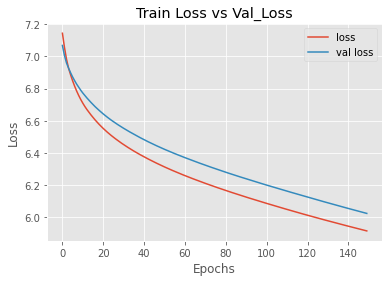

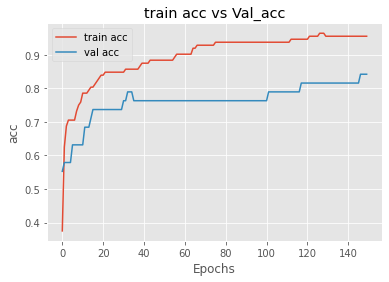

In [243]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist5.history['loss'], label = 'loss')
plt.plot(hist5.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist5.history['acc'], label = 'train acc')
plt.plot(hist5.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()



 

## Dropout
 


In [244]:

#Another common way to avoid regularization is by using the Dropout technique. The main idea behind using dropout is that we randomly turn off some neurons in our layer based on some probability.
from keras.layers import Dropout
# Create a model6 having same layers as the basic model. Add a dropout layer in this model, lets say after the 1st dense layer, and set dropout rate as 50%

# Create a model6 having same layers as the basic model. Add a dropout layer in this model, lets say after the 1st dense layer, and set dropout rate as 50%
model6 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dropout(0.5),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
print(model6.summary())
model6.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist6 = model6.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 512)               2560      
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_129 (Dense)           (None, 256)               131328    
                                                                 
 dense_130 (Dense)           (None, 128)               32896     
                                                                 
 dense_131 (Dense)           (None, 64)                8256      
                                                                 
 dense_132 (Dense)           (None, 32)                2080      
                                                                 
 dense_133 (Dense)           (None, 3)               

In [245]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

 
loss, accuracy, mse = model6.evaluate(X_test, y_test)
print(f'Loss : {loss}\nAccuracy : {accuracy}\nMSE : {mse}')


2/2 [==============================] - 0s 5ms/step - loss: 0.3250 - acc: 0.7895 - mse: 0.0710
Loss : 0.3250151574611664
Accuracy : 0.7894737124443054
MSE : 0.07098045200109482


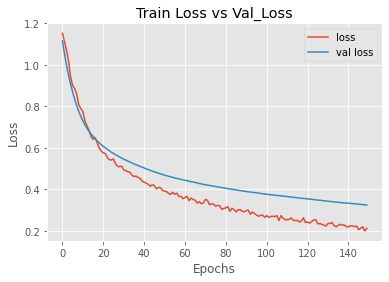

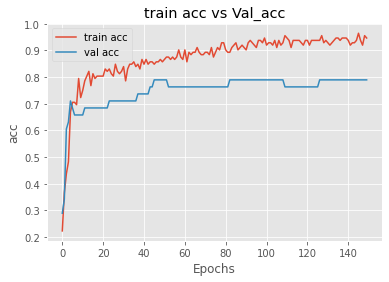

In [246]:

# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before
plt.style.use('ggplot')
plt.plot(hist6.history['loss'], label = 'loss')
plt.plot(hist6.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist6.history['acc'], label = 'train acc')
plt.plot(hist6.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()



In [247]:
# Create model7, having more dropout layers, having a dropout rate of your choice

model7 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dropout(0.45),
    Dense(512//2, activation='tanh'),
    Dropout(0.51),
    Dense(512//4, activation='tanh'),
    Dropout(0.2),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
print(model7.summary())
model7.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist7 = model7.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 512)               2560      
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_135 (Dense)           (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_136 (Dense)           (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_137 (Dense)           (None, 64)              

In [248]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set


loss, accuracy, mse = model7.evaluate(X_test, y_test)
print(f'Loss : {loss}\nAccuracy : {accuracy}\nMSE : {mse}')



2/2 [==============================] - 0s 7ms/step - loss: 0.3792 - acc: 0.7632 - mse: 0.0857
Loss : 0.37922823429107666
Accuracy : 0.7631579041481018
MSE : 0.08572333306074142


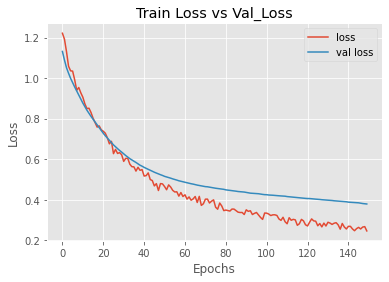

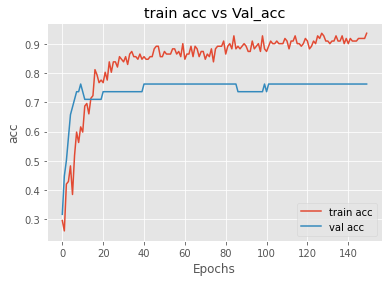

In [249]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before
plt.style.use('ggplot')
plt.plot(hist7.history['loss'], label = 'loss')
plt.plot(hist7.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist7.history['acc'], label = 'train acc')
plt.plot(hist7.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()



## Batch Normalization


In [250]:

# The main idea behind batch normalization is that we normalize the input layer by using several techniques (sklearn.preprocessing.StandardScaler) in our case, which improves the model performance, so if the input layer is benefitted by normalization, why not normalize the hidden layers, which will improve and fasten learning even further.

# To add it in your TensorFlow model, just add tf.keras.layers.BatchNormalization() after your layers.

#Create model8, having same layers as the first model, but this time add a BatchNormalization layer after the first or second dense layer

model8 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dense(512//2, activation='tanh'),
    BatchNormalization(),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
print(model8.summary())
model8.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist8 = model8.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))
 


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 512)               2560      
                                                                 
 dense_141 (Dense)           (None, 256)               131328    
                                                                 
 batch_normalization_11 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_142 (Dense)           (None, 128)               32896     
                                                                 
 dense_143 (Dense)           (None, 64)                8256      
                                                                 
 dense_144 (Dense)           (None, 32)                2080      
                                                     

In [251]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set
loss, accuracy, mse = model8.evaluate(X_test, y_test)
print(f'Loss : {loss}\nAccuracy : {accuracy}\nMSE : {mse}')

2/2 [==============================] - 0s 7ms/step - loss: 0.4025 - acc: 0.8421 - mse: 0.0758
Loss : 0.40254566073417664
Accuracy : 0.8421052694320679
MSE : 0.07577540725469589


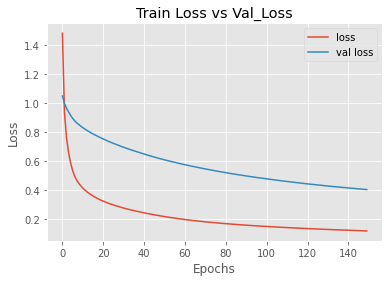

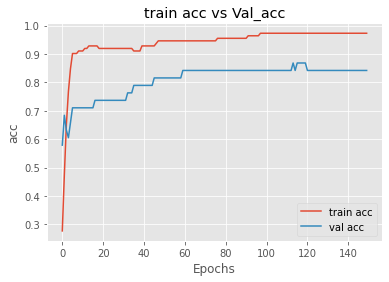

In [252]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before
plt.style.use('ggplot')
plt.plot(hist8.history['loss'], label = 'loss')
plt.plot(hist8.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist8.history['acc'], label = 'train acc')
plt.plot(hist8.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()



In [253]:

# Now create model9, having a BatchNormalization layer after each dense layer
model9 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    BatchNormalization(),
    Dense(512//2, activation='tanh'),
    BatchNormalization(),
    Dense(512//4, activation='tanh'),
    BatchNormalization(),
    Dense(512//8, activation='tanh'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
])
print(model9.summary())
model9.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist9 = model9.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 512)               2560      
                                                                 
 batch_normalization_12 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_147 (Dense)           (None, 256)               131328    
                                                                 
 batch_normalization_13 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_148 (Dense)           (None, 128)               32896     
                                                                 
 batch_normalization_14 (Bat  (None, 128)            

In [254]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss, accuracy, mse = model9.evaluate(X_test, y_test)
print(f'Loss : {loss}\nAccuracy : {accuracy}\nMSE : {mse}')
 

2/2 [==============================] - 0s 6ms/step - loss: 0.6258 - acc: 0.7368 - mse: 0.1234
Loss : 0.6257731914520264
Accuracy : 0.7368420958518982
MSE : 0.1233808621764183


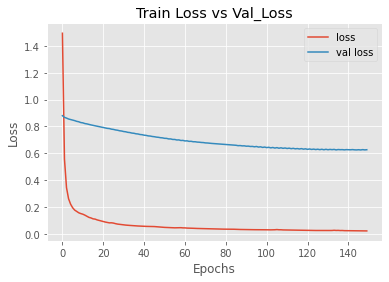

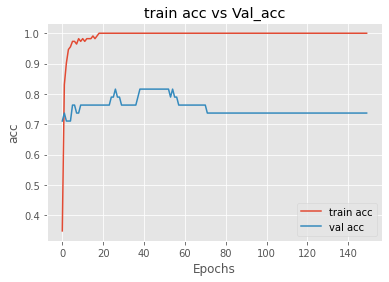

In [255]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist9.history['loss'], label = 'loss')
plt.plot(hist9.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist9.history['acc'], label = 'train acc')
plt.plot(hist9.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


### After completing the above tasks, note down what you've understood and observed in each of the 9 models and what type of regularization works best for this dataset



Using batch normalisation after the first or the second layer works best since it gives the best accuracy .